# ***Libraries Used***

In [1]:
# Data-frame manipulation and visualization
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt


C:\Users\11th Generation\AppData\Local\Temp\ipykernel_17984\2557829547.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Pre-Processing, Model Training and Model Selection Libraries
from sklearn.preprocessing import   (   
                                        StandardScaler, MinMaxScaler, 
                                        LabelEncoder, OneHotEncoder, OrdinalEncoder 
                                    )

from sklearn.model_selection import (   
                                        train_test_split, 
                                        StratifiedKFold, cross_val_score 
                                    )

from sklearn.pipeline import        (   
                                        Pipeline,
                                        make_pipeline
                                    )

from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV



In [3]:
# Classification models used
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

# Loading and first impressions of dataset

In [4]:
test_data= pd.read_csv(r"customer_churn_dataset-testing-master.csv")

In [5]:
test_data.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
test_data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
df= pd.read_csv(r"customer_churn_dataset-training-master.csv")

In [9]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [10]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


# EDA, Visualization and Preprocessing

In [12]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

**It seems that there is only a single row of null values in our dataset. Lets try and verify this**

In [13]:
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**This shows that entry number 199295 was null. Now the most appropriate way to handle the null row is to drop it. This is because it is a single row in a huge dataset which would not make any difference whatsoever**

In [14]:
df= df.dropna()

In [15]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [16]:
df.shape

(440832, 12)

Checking for any duplicates

In [17]:
df.duplicated().sum()

0

No duplicates present

In [18]:
categorical_cols= df.select_dtypes(include='object').columns

In [19]:
categorical_cols

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

# Visualization of categorical columns


In [20]:
df[categorical_cols].describe()

,Gender,Subscription Type,Contract Length
count,440832,440832,440832
unique,2,3,3
top,Male,Standard,Annual
freq,250252,149128,177198


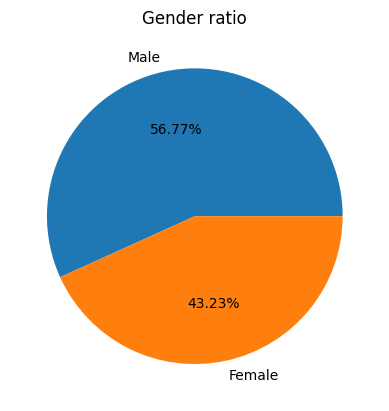

In [21]:
#Gender ratios in data
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index, autopct='%1.2f%%')
plt.title('Gender ratio')
plt.show()

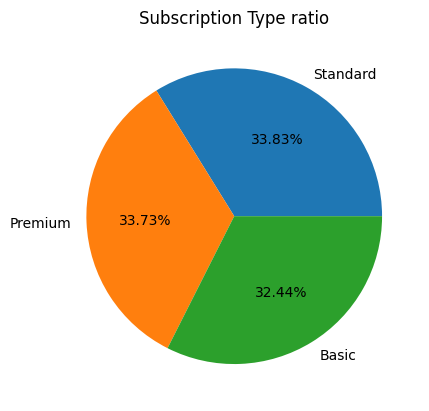

In [22]:
#Subscription Types ratios in data
plt.pie(df['Subscription Type'].value_counts(),labels=df['Subscription Type'].value_counts().index, autopct='%1.2f%%')
plt.title('Subscription Type ratio')
plt.show()

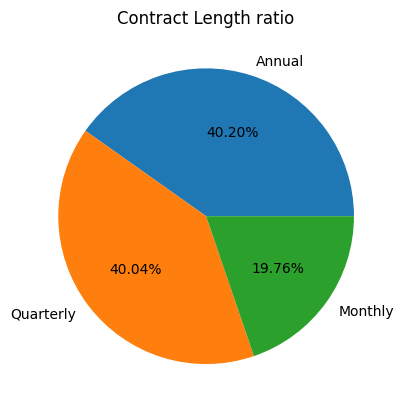

In [23]:
plt.pie(df['Contract Length'].value_counts(),labels=df['Contract Length'].value_counts().index, autopct='%1.2f%%')
plt.title('Contract Length ratio')
plt.show()

The pie charts show that in terms of gender, Males have a higher count then Females. Also, generally, there is an equal proportion people with all 3 types of subscription. Finally, quarterly and annual contract lengths are pretty even in numbers, while monthly contract lengths are the least frequent.

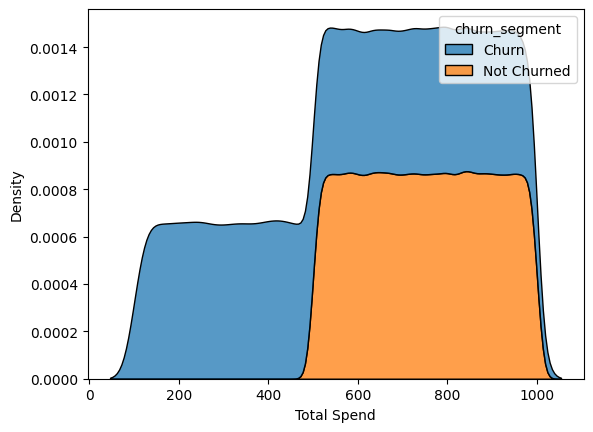

In [24]:
filtered = df.copy()
filtered['churn_segment'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['Churn']]

sns.kdeplot(data=filtered, x="Total Spend", hue="churn_segment", multiple="stack")
plt.show()

 both groups spend within a similar range, but the churned group (blue) has a slightly higher density in certain spending ranges, which could indicate that higher spenders have a greater churn risk.

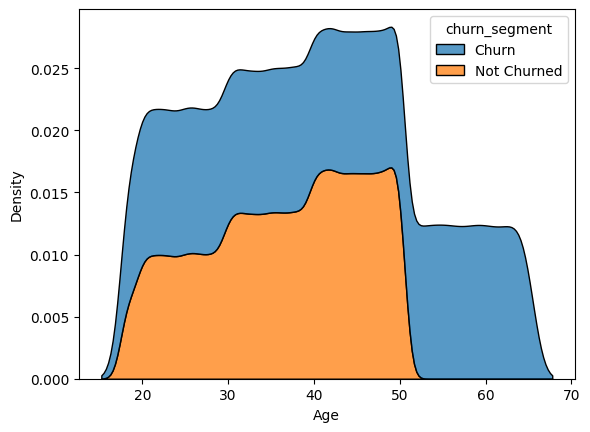

In [25]:
filtered = df.copy()
filtered['churn_segment'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['Churn']]

sns.kdeplot(data=filtered, x="Age", hue="churn_segment", multiple="stack")
plt.show()

People of old age (above 50) seem to be more likely to churn

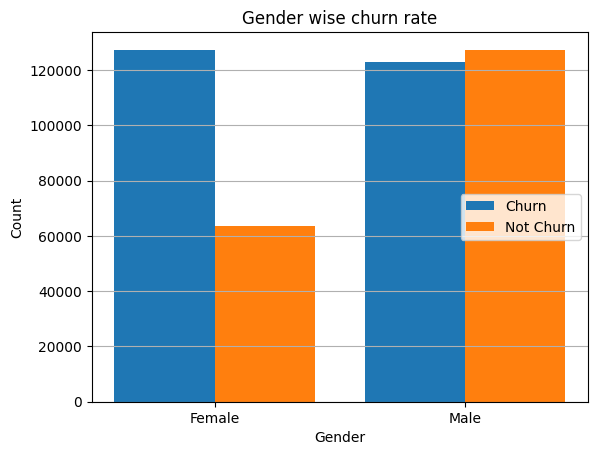

In [26]:
gender_churn = df.groupby(['Gender', 'Churn']).size().unstack()

X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:, 0])
churn_1 = list(gender_churn.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender wise churn rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

Females have a much higher churn rate then not churn rate, while men have higher not churn rate

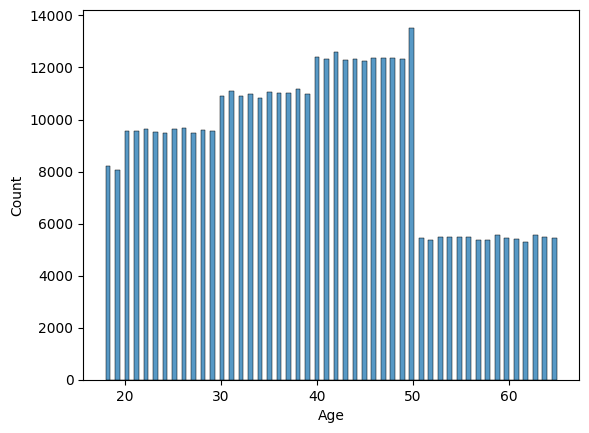

<Figure size 100x100 with 0 Axes>

In [27]:
sns.histplot(df['Age'])
plt.figure(figsize=(1,1))
plt.show()

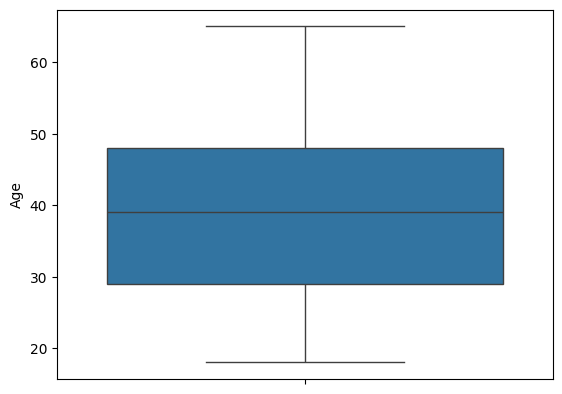

<Figure size 100x100 with 0 Axes>

In [28]:
sns.boxplot(df['Age'])
plt.figure(figsize=(1,1))
plt.show()

The dataset has more people under the age of 50 and less people over the age of 50 with median age of around 40

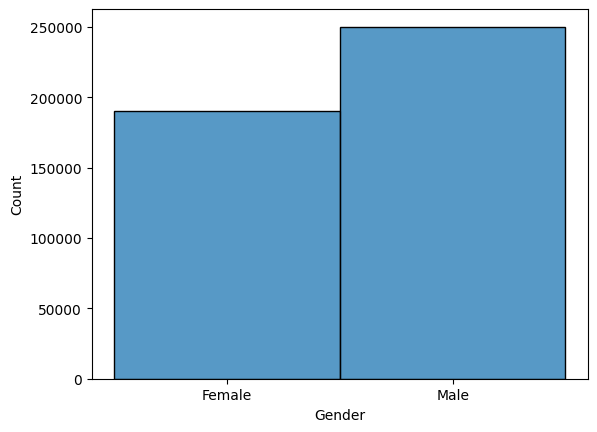

<Figure size 100x100 with 0 Axes>

In [29]:
sns.histplot(df['Gender'])
plt.figure(figsize=(1,1))
plt.show()

Data is dominated by Male count

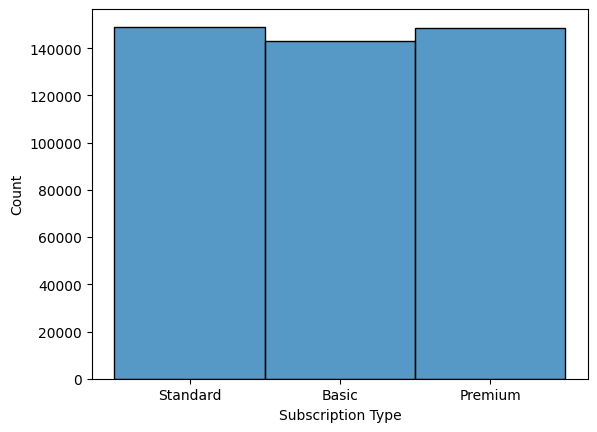

<Figure size 100x100 with 0 Axes>

In [30]:
sns.histplot(df['Subscription Type'])
plt.figure(figsize=(1,1))
plt.show()

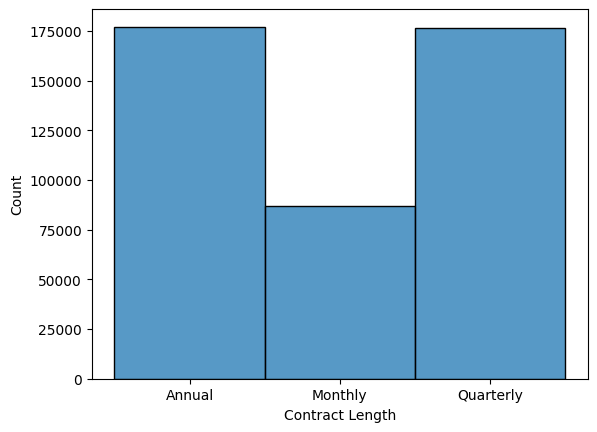

<Figure size 100x100 with 0 Axes>

In [31]:
sns.histplot(df['Contract Length'])
plt.figure(figsize=(1,1))
plt.show()

Least number of people in the dataset have a monthly contract length and a basic subscription type.

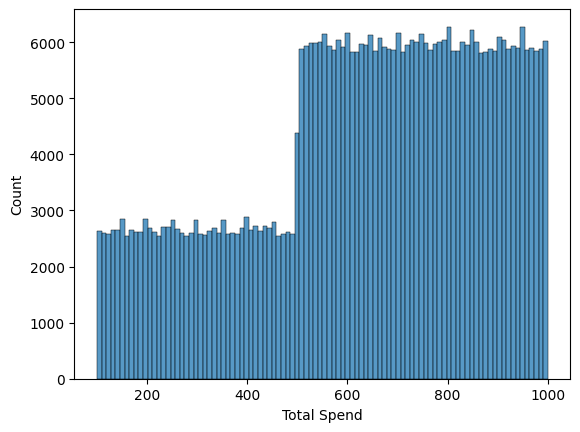

<Figure size 100x100 with 0 Axes>

In [32]:
sns.histplot(df['Total Spend'])
plt.figure(figsize=(1,1))
plt.show()

Most people in the data have a higher then $500 Total spending. 

# We will like to present optimal encoder choices to optimally encode the categorical columns in our dataset. 

In [33]:
for i in categorical_cols:
    print(df[i].value_counts())
    print()

Gender
Male      250252
Female    190580
Name: count, dtype: int64

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64



For the 'Gender' column, the most obvious choice is One Hot Encoder as there is no ordinal relation between the 2 Genders, Male and Female. 
However, Subscription Type and Contract Length seem to have an ordinal relationship between classes.
For instances, a subscription type Premium is more expensive/higher then basic, or, Annual Contract Length is more then monthly...

# Dropping Columns by analysis of importance

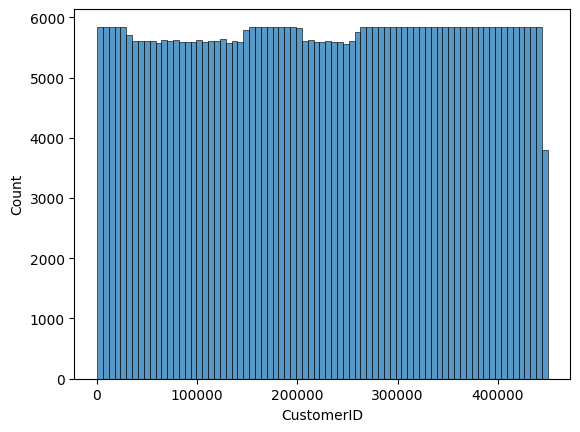

<Figure size 100x100 with 0 Axes>

In [34]:
sns.histplot(df['CustomerID'])
plt.figure(figsize=(1,1))
plt.show()

It seems like this column simply gives the unique ID of each customer and so by intuition, does not give any useful information.

In [35]:
df= df.drop(columns= ['CustomerID'], axis=1)

In [36]:
test_data= test_data.drop(columns=['CustomerID'], axis=1)

In [37]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [38]:
test_data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  object
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.4+ MB


**The train data (df) and test_data have a difference in data types for numeric columns, where train data (df) has `float64` values, while test data has `int64` values. Appropriately, we will handle this issue before moving forward towards model training and testing**

In [41]:
test_data = test_data.astype(df.dtypes.to_dict())

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                64374 non-null  float64
 1   Gender             64374 non-null  object 
 2   Tenure             64374 non-null  float64
 3   Usage Frequency    64374 non-null  float64
 4   Support Calls      64374 non-null  float64
 5   Payment Delay      64374 non-null  float64
 6   Subscription Type  64374 non-null  object 
 7   Contract Length    64374 non-null  object 
 8   Total Spend        64374 non-null  float64
 9   Last Interaction   64374 non-null  float64
 10  Churn              64374 non-null  float64
dtypes: float64(8), object(3)
memory usage: 5.4+ MB


# Churn(1) or Not Churn(0) distribution 

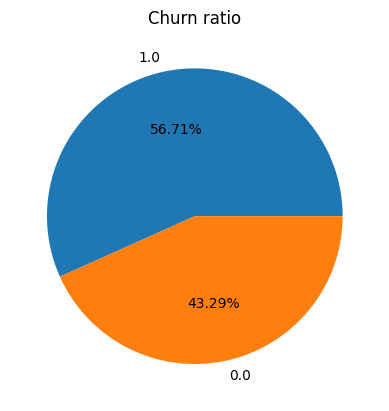

In [44]:
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index, autopct='%1.2f%%')
plt.title('Churn ratio')
plt.show()

### Model Training Approach

In this project, we are training all models through a systematic approach using **pipelines** and **grid search for hyperparameter tuning** to streamline the workflow and optimize model performance.

1. **Pipelines**: We utilize scikit-learn’s `Pipeline` class to encapsulate each model along with any preprocessing steps required for that model. This ensures that each model follows the same sequence of preprocessing, feature engineering, and training steps, making the process more organized and less prone to errors. Pipelines also help prevent data leakage by applying transformations to the training data and test data consistently.

2. **Grid Search for Hyperparameter Tuning**: For each model, we define a set of hyperparameters to explore using `GridSearchCV`. This allows us to systematically search through various combinations of hyperparameters to find the optimal settings for each model. Grid search uses cross-validation to evaluate model performance across different splits of the data, giving us a robust measure of model effectiveness for each parameter combination.

3. **Finding Optimal Models**: By combining pipelines with grid search, we can efficiently test multiple models and their corresponding hyperparameters, ensuring a comprehensive evaluation of model performance. The grid search returns the best model with the highest performance metrics based on our evaluation criteria, which we then use as our optimal model.

This approach enables us to maintain a scalable and reproducible workflow while optimizing model accuracy, reducing overfitting, and achieving consistent preprocessing across all models.


# Initial Setup

In [45]:
ohe= OneHotEncoder(sparse_output=False)
ord= OrdinalEncoder(categories=[
    ['Basic', 'Standard', 'Premium'], 
    ['Monthly', 'Quarterly', 'Annual']
    ])


In [46]:
ss= StandardScaler()

In [47]:
ohe_cols= ['Gender']
ord_cols= ['Subscription Type', 'Contract Length']
num_cols= ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

In [48]:
X= df.drop(columns=['Churn'], axis=1)
y= df['Churn']
X_test= test_data.drop(columns=['Churn'], axis=1)
y_test= test_data['Churn']

In [49]:
X_train, X_validate, y_train, y_validate= train_test_split(X, y, test_size=0.2, stratify=y ,random_state=42)

# Building Pipelines

In [50]:
ordinal_pipeline= Pipeline(steps=[
    
    ('ord' , OrdinalEncoder(categories=[
    
    ['Basic', 'Standard', 'Premium'], 
    
    ['Monthly', 'Quarterly', 'Annual']
    
    ]))
])

In [51]:
ohe_pipeline= Pipeline(steps= [
    
    ('one-hot' , OneHotEncoder(sparse_output=False))

])

In [52]:
column_transformer= ColumnTransformer(transformers=[
    
    ('onehot_pipeline', ohe_pipeline, ohe_cols),
    
    ('ordinal_pipeline', ordinal_pipeline, ord_cols),
    
    ('passthrough', 'passthrough', ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']),
    
    ],
    
    remainder= 'drop',
    
    n_jobs= -1

)

# ***Model Trainings***

# Model 1: Decision Tree Classifier

In [53]:
dt= DecisionTreeClassifier()

In [54]:
param_grid_dt = {
    
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'criterion': ['gini', 'entropy']

}


In [55]:
CV_dt= GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv= StratifiedKFold(n_splits=3))

In [56]:
final_dt_pipe= make_pipeline(column_transformer, CV_dt)
final_dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('onehot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Gender']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Basic',
                                                                                               'Standard',
                                                                                               'Premium'],
                                                                                              ['Monthly',
                                                                                               'Quarterly',
                                                                                               'Annual']]))]),
                                                  ['Subscription Type',
                                                   'Contract Length']),
                                                 ('passthrough', 'passthrough',
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 10],
                                          'min_samples_leaf': [1],
                                          'min_samples_split': [2]}))])

In [57]:
print(CV_dt.best_score_)
print(CV_dt.best_params_)

0.9999234400918718
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [58]:
final_dt_pipe.score(X_validate, y_validate)

0.999897920990847

In [59]:
final_dt_pipe.score(X_test, y_test)

0.5032777208189642

# Model 2: Naive Bayes

In [65]:
nb= GaussianNB()

In [66]:
param_grid_nb = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [67]:
CV_nb= GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv= StratifiedKFold(n_splits=3))

In [68]:
final_nb_pipe= make_pipeline(column_transformer, CV_nb)
final_nb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('onehot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Gender']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Basic',
                                                                                               'Standard',
                                                                                               'Premium'],
                                                                                              ['Monthly',
                                                                                               'Quarterly',
                                                                                               'Annual']]))]),
                                                  ['Subscription Type',
                                                   'Contract Length']),
                                                 ('passthrough', 'passthrough',
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-11, 1e-10, 1e-09,
                                                            1e-08, 1e-07, 1e-06,
                                                            1e-05]}))])

In [69]:
final_nb_pipe.score(X_validate, y_validate)

0.9305295632152619

In [70]:
final_nb_pipe.score(X_test, y_test)

0.5533600521949855

# Model 3: Random Forest

In [93]:
rf= RandomForestClassifier()

In [100]:
param_grid_rf = {
    
    'n_estimators': [120],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'criterion': ['entropy']

}

In [101]:
CV_rf= GridSearchCV(estimator= rf ,param_grid= param_grid_rf, cv= StratifiedKFold(n_splits=2))

In [102]:
final_rf_pipeline= make_pipeline(column_transformer, CV_rf)
final_rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('onehot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Gender']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Basic',
                                                                                               'Standard',
                                                                                               'Premium'],
                                                                                              ['Monthly',
                                                                                               'Quarterly',
                                                                                               'Annual']]))]),
                                                  ['Subscription Type',
                                                   'Contract Length'...
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['entropy'],
                                          'max_depth': [10],
                                          'min_samples_leaf': [1],
                                          'min_samples_split': [2],
                                          'n_estimators': [120]}))])

In [103]:
final_rf_pipeline.score(X_validate, y_validate)

0.9913119421098597

In [104]:
final_rf_pipeline.score(X_test, y_test)

0.5124429117345513

# Model 4: KNN

In [106]:
knn= KNeighborsClassifier()

In [105]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'minkowski']
}

In [107]:
CV_knn= GridSearchCV(estimator= knn, param_grid= param_grid_knn, cv= StratifiedKFold(n_splits=2))

In [108]:
final_knn_pipeline= make_pipeline(column_transformer, CV_knn)
final_knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('onehot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Gender']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Basic',
                                                                                               'Standard',
                                                                                               'Premium'],
                                                                                              ['Monthly',
                                                                                               'Quarterly',
                                                                                               'Annual']]))]),
                                                  ['Subscription Type',
                                                   'Contract Length']),
                                                 ('passthrough', 'passthrough',
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'metric': ['euclidean', 'minkowski'],
                                          'n_neighbors': [3, 5, 7],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [109]:
final_knn_pipeline.score(X_validate, y_validate)

0.8935542776775891

In [110]:
final_knn_pipeline.score(X_test, y_test)

0.5803274613974586

In [111]:
lr= LogisticRegression()

In [112]:
param_grid_lr = {
    'penalty': ['l2'], 
    'C': [0.01, 0.1],  
    'solver': ['liblinear'],  
    'max_iter': [100]
}

In [113]:
CV_lr= GridSearchCV(estimator= lr, param_grid= param_grid_lr, cv= StratifiedKFold(n_splits=2))

In [114]:
final_lr_pipeline= make_pipeline(column_transformer, CV_lr)
final_lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('onehot_pipeline',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Gender']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Basic',
                                                                                               'Standard',
                                                                                               'Premium'],
                                                                                              ['Monthly',
                                                                                               'Quarterly',
                                                                                               'Annual']]))]),
                                                  ['Subscription Type',
                                                   'Contract Length']),
                                                 ('passthrough', 'passthrough',
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [0.01, 0.1], 'max_iter': [100],
                                          'penalty': ['l2'],
                                          'solver': ['liblinear']}))])

In [115]:
final_lr_pipeline.score(X_validate, y_validate)

0.8700761055723797

In [116]:
final_lr_pipeline.score(X_test, y_test)

0.5791002578680834

In [64]:

param_grid_svc_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}

param_grid_svc_poly = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['poly'],
    'degree': [2, 3],
    'coef0': [0.0, 0.1]
}

param_grid_svc_rbf = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_svc_sigmoid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['sigmoid'],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5]
}

# Combine the grids into a list
param_grid_svc = [param_grid_svc_linear, param_grid_svc_poly, param_grid_svc_rbf, param_grid_svc_sigmoid]



In [118]:
svc= SVC()

In [122]:
param_grids_svm= {
    'C': [0.1],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

In [123]:
CV_svm= GridSearchCV(estimator= svc, param_grid= param_grids_svm, cv= StratifiedKFold(n_splits=2))

In [124]:
final_svc_pipeline= make_pipeline(column_transformer, CV_svm)

In [125]:
final_svc_pipeline.fit(X_train, y_train)

KeyboardInterrupt: 